# NSLS-II: Image segmentation workflow example

## Sample Dataset

### Global Dependencies:

# @giltis: TODO -- Convert file loading operations (and saving operations) to use PIMS exclusively

# @giltis: TODO -- Demonstrate use of **suitcase** for file saving

In [4]:
from xray_vision.mpl_plotting.img_proc_tools import plot_multiple_dsets

%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import scipy as sp
import pims
#import tifffile
#import cv2
#import mayavi.mlab as mlab
import pyqtgraph as pqg
import vtk
import skxray
from skxray import io
from vttools.to_wrap.image.io import read_tiff
import skimage
import tomopy

# Reconstruction

Add reconstruction information and example here

USING TOMOPY

### List of camera files associated with the data sets

Note there are three .SPE camera files associated with each data set. The data was collected as part of a biofilm growth experiment conducted in collaboration with Dorthe Wildenschild. Imaging was conducted at the Advanced Photon Source, Argonne National Laboratory, Sector 13, BM-D.

The data was collected in March of 2012.

In [21]:
path_cam_files = "../data/mCT/camera_files/"
cam_fname_abv = ['biofilm_abv_cam_1.SPE', 'biofilm_abv_cam_2.SPE', 'biofilm_abv_cam_3.SPE']
cam_fname_blw = ['biofilm_blw_cam_1.SPE', 'biofilm_blw_cam_2.SPE', 'biofilm_blw_cam_3.SPE']

## Load raw camera (SPE) data for reconstruction

In [22]:
camfile_abv = []
camfile_blw = []
cam_lst = [camfile_abv, camfile_blw]
for index, dset_list in enumerate([cam_fname_abv, cam_fname_blw]):
    for fname in dset_list:
        cam_lst[index].append(tomopy.read_aps_13bm(path_cam_files + fname, 'spe'))


ERROR:tomopy.io.reader:unknown file extension
ERROR:tomopy.io.reader:unknown file extension
ERROR:tomopy.io.reader:unknown file extension
ERROR:tomopy.io.reader:unknown file extension
ERROR:tomopy.io.reader:unknown file extension
ERROR:tomopy.io.reader:unknown file extension


In [11]:
#help(tomopy.recon)

In [25]:
camfile_abv
np.amax(camfile_abv[0])

4095

In [10]:
#help(tomopy.read_aps_13bm)

## Step 1: Import Above and Below Edge volumes:

### Module: PIMS

In [5]:
#vol_abv = pims.TiffStack(fname_abv)
#vol_blw = pims.TiffStack(fname_blw)

### This module contains functions and tools for reading, writing and converting common image processing files and file types.

In [10]:
ls

APS-1-450mLphr-A_33pcntBa__A_recon.volume   NSLS_shale_smpl-2_AbvFe.tiff
APS-1-450mLphr-A_33pcntBa__B_recon.volume   NSLS_shale_smpl-2_AbvFe.yaml
download_data.py                            NSLS_shale_smpl-2_BlwFe.tiff
ipTools_DryScan_SegDemo.ipynb               NSLS_shale_smpl-2_BlwFe.yaml
NSLS-II Segmentation workflow design.ipynb  shale_seg_demo.ipynb


In [6]:
data_path = "../data/"

In [7]:
#fname_abv_tiff = data_path + "uCT/NSLS_shale_smpl-2_AbvFe.tiff"
fname_blw_tiff = data_path + "uCT/NSLS_shale_smpl-2_BlwFe.tiff"
fname_abv = data_path + "mCT/biofilm_33pcntBa__A_recon.volume"
fname_blw = data_path + "mCT/biofilm_33pcntBa__B_recon.volume"
fname_bdpack = data_path + "mCT/dry_beadpack_A_recon.volume"


In [8]:
ls ../data/uCT/

NSLS_shale_smpl-1_AbvFe.tiff  NSLS_shale_smpl-2_BlwFe.tiff  shale_demo_data.zip
NSLS_shale_smpl-1_AbvFe.yaml  NSLS_shale_smpl-2_BlwFe.yaml
NSLS_shale_smpl-2_AbvFe.yaml  shale_demo_data.tar.gz


In [9]:
pwd

u'/home/giltis/dev/my_src/Demos/demos/tomography/end-to-end'

In [10]:
tst = read_tiff(fname_blw_tiff)

In [11]:
fnames = [fname_abv, fname_blw, fname_bdpack]
#for index, var in enumerate(fnames):
#    print index
#    print var
header_abv, vol_abv = io.net_cdf_io.load_netCDF(fname_abv)
header_blw, vol_blw = io.net_cdf_io.load_netCDF(fname_blw)
header_dry, vol_dry = io.net_cdf_io.load_netCDF(fname_bdpack)

print "Array Max Value: " + str(np.max(vol_abv))
print "Array Min Value: " + str(np.min(vol_abv))
#print header_dict_abv


Array Max Value: 27953.0
Array Min Value: -19822.0


## Sample netCDF header
The header in these netCDF files retains important information pertinent to not only the data set, but also to how the data set was collected.

### Header Example:

In [12]:
print header_blw

OrderedDict([(u'title', u'450 mL/hr Column A'), (u'operator', u'Iltis'), (u'camera', u'Coolsnap, Nikon Macro 37mm tube, focus 0.27'), (u'sample', u'APS-1-450mLphr-A'), (u'image_type', u'RECONSTRUCTED'), (u'energy', 37.540001), (u'dark_current', 100.0), (u'center', 346.41776), (u'x_pixel_size', 10.5), (u'y_pixel_size', 10.5), (u'z_pixel_size', 0.0), (u'angles', array([   0.  ,    0.25,    0.5 ,    0.75,    1.  ,    1.25,    1.5 ,
          1.75,    2.  ,    2.25,    2.5 ,    2.75,    3.  ,    3.25,
          3.5 ,    3.75,    4.  ,    4.25,    4.5 ,    4.75,    5.  ,
          5.25,    5.5 ,    5.75,    6.  ,    6.25,    6.5 ,    6.75,
          7.  ,    7.25,    7.5 ,    7.75,    8.  ,    8.25,    8.5 ,
          8.75,    9.  ,    9.25,    9.5 ,    9.75,   10.  ,   10.25,
         10.5 ,   10.75,   11.  ,   11.25,   11.5 ,   11.75,   12.  ,
         12.25,   12.5 ,   12.75,   13.  ,   13.25,   13.5 ,   13.75,
         14.  ,   14.25,   14.5 ,   14.75,   15.  ,   15.25,   15.5 ,
       

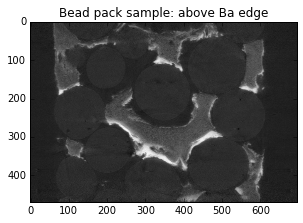

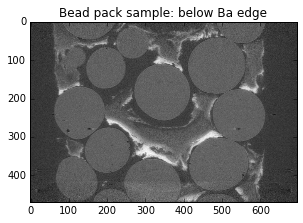

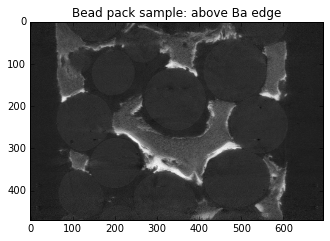

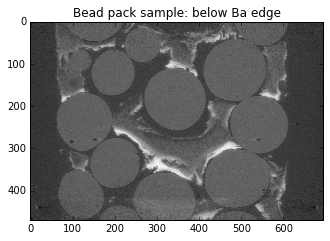

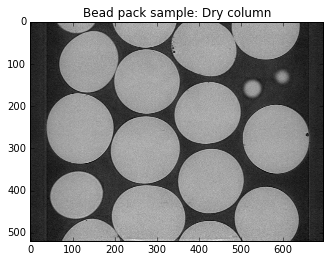

In [27]:
#Select how many of the available volumes to load
num_vols = 3 # Length of the data list, dummy.
axis = "XY"
height = None
num_columns = None
#Input Lists
sample_data = [vol_abv, vol_blw, vol_dry]
plot_titles = ["Bead pack sample: above Ba edge", "Bead pack sample: below Ba edge", "Bead pack sample: Dry column"]
#Error: If other than XY selected and data is only 2D array, then raise error pointing this out.
plot_multiple_dsets (sample_data, 450, plot_titles, "YZ", num_columns=1)

    # if plot_titles=None:
        # for -- create for loop to generate list of str with (Dataset # 'index': 'dset variable name')
#for x in range(num_vols):
#    plt.figure(figsize = (5,(5.25*num_vols)))
#    num_rows = num_vols
#    num_columns = 1
#    plt.subplot(((num_rows * 10 + num_columns) * 10 + (x+1)))
#    plt.imshow(sample_data[x][:,450,:], cmap=plt.cm.gray)
#    plt.title(plot_titles[x])
#plt.show()

In [16]:
import matplotlib.pyplot as plt
def auto_plot (num_figs, num_rows, num_cols, src_data_list, title_list=None, indi_figSize = None, display_slc=None):
    if indi_figSize == None:
        figsize = 5
    else:
        figsize = indi_figSize
    
    plt.figure(figsize = ((figsize*num_cols),(figsize*num_rows)))
    for x in range(len(src_data_list)):
        sample_data = src_data_list[x]
        if len(sample_data.shape) == 2:
            slc = sample_data[x][:,:]
        elif len(sample_data.shape) == 3 and display_slc == None:
            slc = sample_data[x][int(sample_data.shape[0]/2),:,:]
        elif len(sample_data.shape) == 3 and display_slc != None:
            slc = sample_data[x][int(display_slc),:,:]
        plt.subplot(((num_rows * 10 + num_columns) * 10 + (x+1)))
    plt.imshow(slc, cmap=plt.cm.gray)
    plt.title(title_list[x])
    plt.show()


## Step 2: Volume transformation to correct alignment

### Source Packages: vttools.to_wrap.image.transformation.py

### This module contains tools for basic spatial transformation of image volumes

In [17]:
from vttools.to_wrap.image import transformation

The z-axis orientation for all three of the volumes loaded as part of this demonstration is flipped. A problem that isn't necessarily an issue unless spatial orientation is important in the data analysis (e.g. when looking at sequential tiles in a single experimental sample, or when looking at spatial changes in a material over the course of an experiment). As a result, the data sets need to be flipped along the z-axis.

In [21]:
len(sample_data)

3

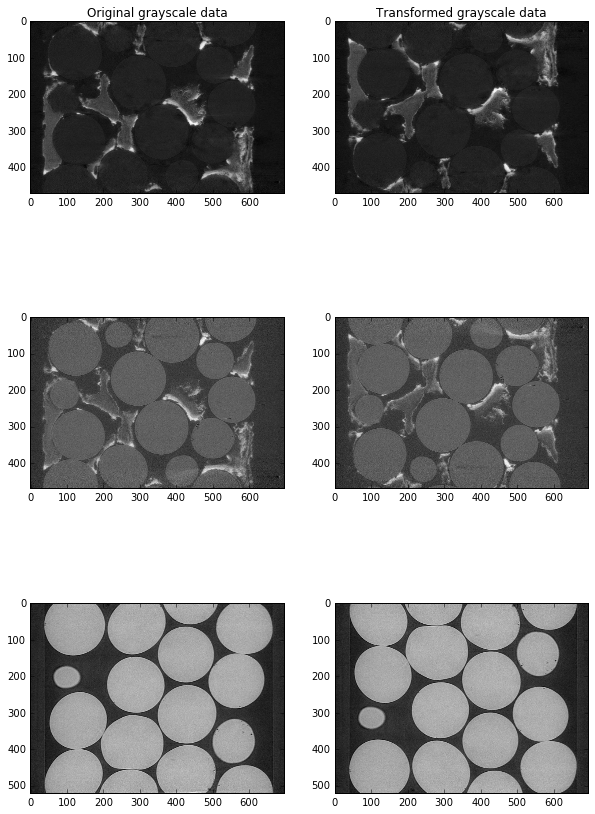

In [25]:
corrected_src_data = []
for x in sample_data:
    xForm_vol = transformation.flip_axis(x, "Flip Z")
    corrected_src_data.append(xForm_vol)
num_rows=3
num_cols=2
plt.figure(figsize = ((5*num_cols),(5*num_rows)))
for x in range(len(corrected_src_data)):
    plt.subplot(((num_rows * 10 + (num_cols)) * 10 + 2*x+1))
    plt.subplot(320+(x*2+1))
    plt.imshow(sample_data[x][:,250,:], cmap=plt.cm.gray)
    if x == 0:
        plt.title('Original grayscale data')
    plt.subplot(((num_rows * 10 + num_cols) * 10 + 2*x+2))
    plt.imshow(corrected_src_data[x][:,250,:], cmap=plt.cm.gray)
    if x == 0:
        plt.title('Transformed grayscale data')

plt.show()

## Step 3: Histogram analysis of trial volume

This module consists of a collection of functions specific to histogram visualization and analysis. A variety of options are included for both displaying and saving histogram data.

### Module: histops.py

In [31]:
from vttools.to_wrap.image import histogram
from xray_vision.mpl_plotting.img_proc_tools import plot_histogram

TypeError: bar() takes at least 2 arguments (0 given)

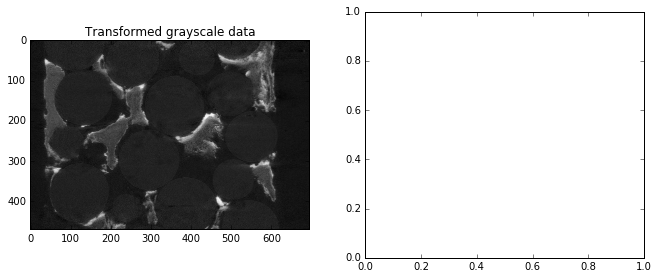

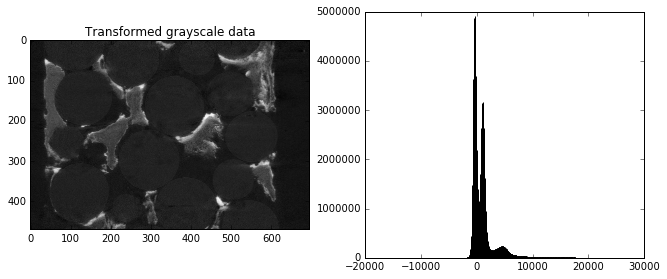

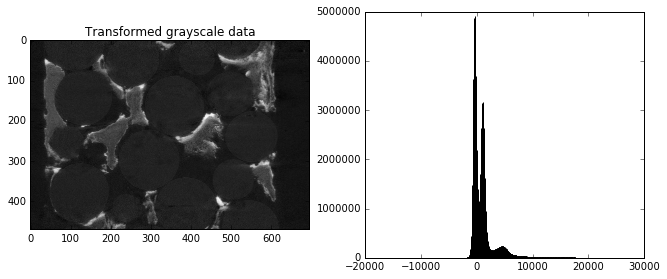

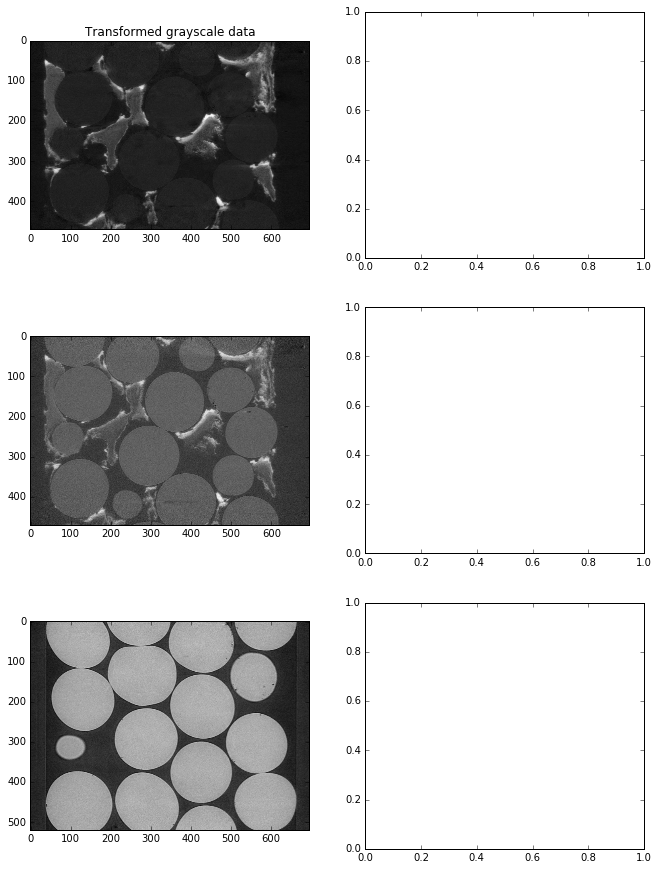

0
2044516


In [35]:

num_cols = 2
num_rows = 3
#num_rows = num_vols

num_bins = 1500
pdf_hist = False
plt.figure(figsize = ((5.5*num_cols),(5*num_rows)))
plot_yscale = 'linear'
for x in range(len(corrected_src_data)):
    hist, bin_edges, bin_avg = histogram.hist_make(corrected_src_data[x], num_bins, pdf_hist)
    
    plot_min = np.amin(corrected_src_data[x])
    plot_max = np.amax(corrected_src_data[x])    
    plt.subplot(((num_rows * 10 + (num_cols)) * 10 + 2*x+1))
    plt.subplot(320+(x*2+1))
    plt.imshow(corrected_src_data[x][:,250,:], cmap=plt.cm.gray)
    if x == 0:
        plt.title('Transformed grayscale data')
    plt.subplot(((num_rows * 10 + num_cols) * 10 + 2*x+2))
    #plot_histogram(hist, bin_edges, plot_min, plot_max, plot_yscale)
plt.show()
print np.amin(hist)
print np.amax(hist)

## Step 4: Thresholding for trial volume segmentation

### Module: threshops.py

### This module contains tools for thresholding image data.

In [11]:
import threshops

In [12]:
#Manual thresholding demonstration
thresh_value = 1000

solid_matrix = []

for x in range(len(corrected_src_data)):
    manual_result = threshops.thresh_globalGT(corrected_src_data[x], thresh_value)
    solid_matrix.append(manual_result)


Thresholding Operation successful:
Selected Threshold Value: 1000
Isolated regions in output data set had a measured intensity GREATER THAN the selected threshold value.


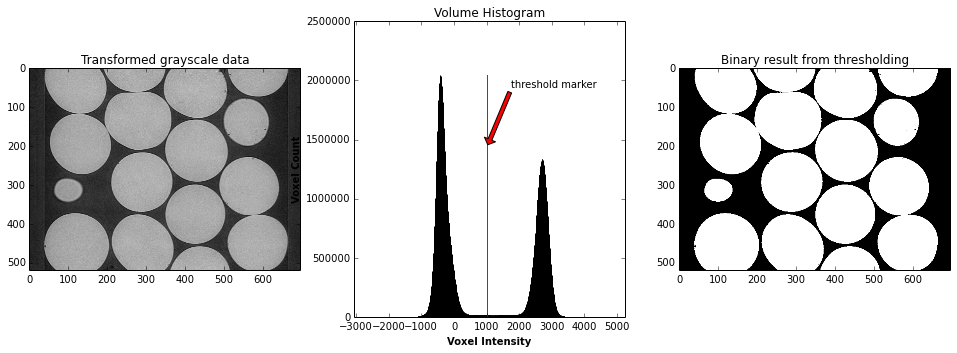

In [13]:
#Plotting manual thresholding results
num_cols = 3
num_rows = 3
#num_rows = num_vols

plt.figure(figsize = ((5.5*num_cols),(6*num_rows)))
for x in range(len(corrected_src_data)):
    hist, bin_edges, bin_avg = histops.hist_make(corrected_src_data[x], num_bins, pdf_hist)
    thresh_coords_x = [thresh_value, thresh_value]
    thresh_coords_y = [np.amin(hist), np.amax(hist)]
    plot_min = np.amin(corrected_src_data[x])
    plot_max = np.amax(corrected_src_data[x])    
    
    plt.subplot(((num_rows * 10 + num_cols) * 10 + num_cols*x+1))
    plt.imshow(corrected_src_data[x][:,250,:], cmap=plt.cm.gray)
    if x == 0:
        plt.title('Transformed grayscale data')
    
    plt.subplot(((num_rows * 10 + num_cols) * 10 + num_cols*x+2))
    histops.hist_plot(hist, bin_edges, plot_min, plot_max, plot_yscale, 'No')
    plt.plot(thresh_coords_x, thresh_coords_y, color='r')
    plt.annotate('threshold marker', 
                 xy=(thresh_value, (np.amax(hist)*0.7)), 
                 xytext=((thresh_value+750), np.amax(hist)*0.95),
                 arrowprops=dict(facecolor='red', shrink=0.05)
                 )
    plt.subplot(((num_rows * 10 + num_cols) * 10 + num_cols*x+3))
    plt.imshow(solid_matrix[x][:,250,:], cmap=plt.cm.gray)
    if x == 0:
        plt.title('Binary result from thresholding')
    
plt.show()

In [14]:
#Automatic thresholding demonstration
auto_adapt_solid = []
auto_otsu_solid = []
auto_yen_solid = []


for x in range(len(corrected_src_data)):
    
    adapt_block_size = 250
    adapt_thresh = threshops.thresh_adapt(corrected_src_data[x], adapt_block_size)
    auto_adapt_solid.append(adapt_thresh)
    
    otsu_thresh_trial, otsu_T_value = threshops.thresh_otsu(corrected_src_data[x])
    auto_otsu_solid.append(otsu_thresh_trial)
    
    yen_thresh_trial, yen_T_value = threshops.thresh_yen(corrected_src_data[x])
    auto_yen_solid.append(yen_thresh_trial)


Thresholding Operation successful:
Selected Threshold Value: 1164.0
Isolated regions in output data set had a measured intensity GREATER THAN the selected threshold value.
Thresholding Operation successful:
Selected Threshold Value: 1164.0
Isolated regions in output data set had a measured intensity GREATER THAN the selected threshold value.


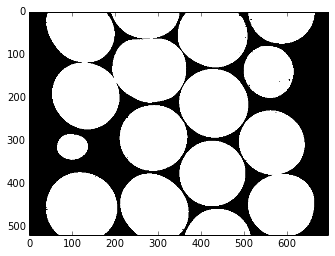

0


In [15]:
plt.imshow(solid_matrix[0][:,250,:], cmap=plt.cm.gray)
plt.show()
for x in range(num_vols):
    print x

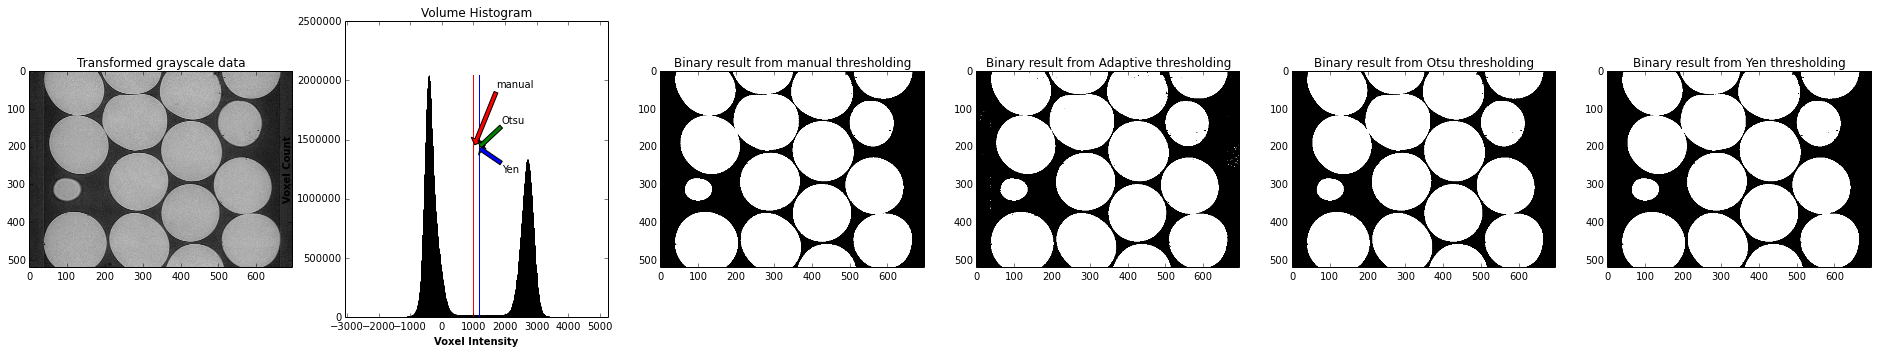

In [16]:
#Plotting automatic thresholding results
num_cols = 6
num_rows = 3
#num_rows = num_vols

plt.figure(figsize = ((5.5*num_cols),(6*num_rows)))
for x in range(num_vols):
    hist, bin_edges, bin_avg = histops.hist_make(corrected_src_data[x], num_bins, pdf_hist)
    
    thresh_type_labels = ['manual', 'Otsu', 'Yen']
    label_offsets = [0.95, 0.8, 0.6]
    thresh_coords_x = [[thresh_value, thresh_value], 
                       [otsu_T_value, otsu_T_value], 
                       [yen_T_value, yen_T_value]]
    thresh_coords_y = [np.amin(hist), np.amax(hist)]
    color_set_ = ['r', 'g', 'b']
    
    plot_min = np.amin(corrected_src_data[x])
    plot_max = np.amax(corrected_src_data[x])    
    
    plt.subplot(((num_rows * 10 + num_cols) * 10 + num_cols*x+1))
    plt.imshow(corrected_src_data[x][:,250,:], cmap=plt.cm.gray)
    if x == 0:
        plt.title('Transformed grayscale data')
    
    plt.subplot(((num_rows * 10 + num_cols) * 10 + num_cols*x+2))
    histops.hist_plot(hist, bin_edges, plot_min, plot_max, plot_yscale, 'No')
    for y in range(len(thresh_type_labels)):
        plt.plot(thresh_coords_x[y], thresh_coords_y, color=color_set_[y])
        plt.annotate(thresh_type_labels[y], 
                     xy=(thresh_coords_x[y][0], (np.amax(hist)*0.7)),
                     xytext=((thresh_coords_x[y][0]+750), np.amax(hist)*label_offsets[y]), 
                     arrowprops=dict(facecolor=color_set_[y], shrink=0.05))
    plt.subplot(((num_rows * 10 + num_cols) * 10 + num_cols*x+3))
    plt.imshow(solid_matrix[x][:,250,:], cmap=plt.cm.gray)
    if x == 0:
        plt.title('Binary result from manual thresholding')
    plt.subplot(((num_rows * 10 + num_cols) * 10 + num_cols*x+4))
    
    plt.imshow(auto_adapt_solid[x][:,250,:], cmap=plt.cm.gray)
    if x == 0:
        plt.title('Binary result from Adaptive thresholding')
    plt.subplot(((num_rows * 10 + num_cols) * 10 + num_cols*x+5))
    plt.imshow(auto_otsu_solid[x][:,250,:], cmap=plt.cm.gray)
    if x == 0:
        plt.title('Binary result from Otsu thresholding')
    plt.subplot(((num_rows * 10 + num_cols) * 10 + num_cols*x+6))
    plt.imshow(auto_yen_solid[x][:,250,:], cmap=plt.cm.gray)
    if x == 0:
        plt.title('Binary result from Yen thresholding')
plt.show()

### Adaptive thresholding: Block size evaluation

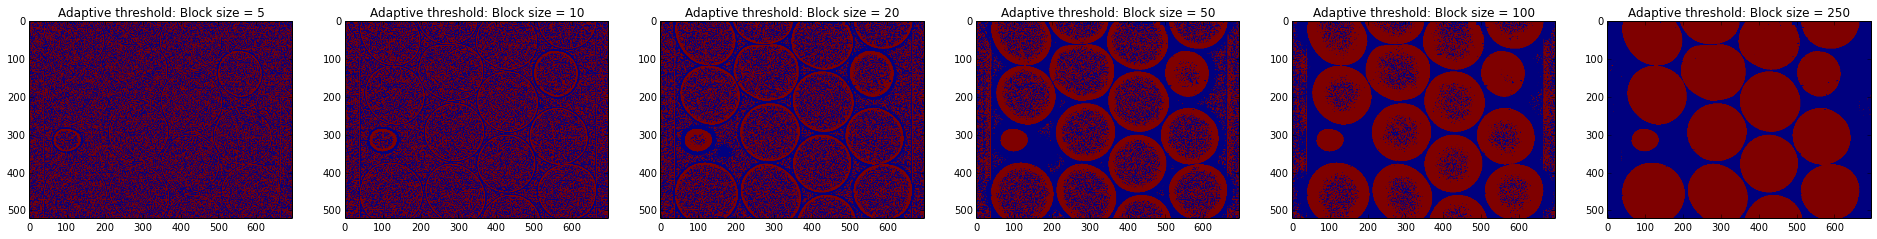

In [17]:
ad_block_size = [5, 10, 20, 50, 100, 250]
num_cols = 6
num_rows = 3
#num_rows = num_vols

ad_test = []
plt.figure(figsize = (((5.5*num_cols),(6*num_rows))))
for x in range(len(corrected_src_data)):
    for y in range(len(ad_block_size)):
        tmp_binary = threshops.thresh_adapt(corrected_src_data[x], ad_block_size[y])
        ad_test.append(tmp_binary)
        if y == 0:
            plt.subplot(((num_rows * 10 + num_cols) * 10 + num_cols*x+1))
            plt.imshow(corrected_src_data[x][:,250,:], cmap=plt.cm.gray)
            plt.title("Original Data")
        plt.subplot(((num_rows * 10 + num_cols) * 10 + num_cols*x+y+1))
        plt.imshow(ad_test[y][:,250,:])
        plt.title("Adaptive threshold: Block size = " + str(ad_block_size[y]))

plt.show()

## Step 5: Isolate pore space

### Module: mathops.py

In [24]:
import mathops


In [25]:
pore_space = []

for x in range(len(solid_matrix)):
    tmp_pore = np.logical_not(solid_matrix[x])
    pore_space.append(tmp_pore)


## Step 6: Generate exterior mask

### Module: synth_drawing

In [26]:
import synth_drawing

In [27]:

exterior_mask=synth_drawing.draw_cylinder(corrected_src_data[0], None, 325, None, None, 'YES')


#### Masked volume demonstration

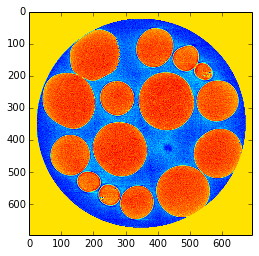

In [28]:
mask_demo=synth_drawing.draw_cylinder(corrected_src_data[0], 
                                      radius=325, 
                                      value = 2000, 
                                      draw_exterior='YES', 
                                      apply_mask='yes')

plt.imshow(mask_demo[50,:,:])
plt.show()

### Isolated phase presentation:

In [31]:
#Glass beads: solid_matrix[0]
#Pore space: pore_space[0]
#exterior: exterior_mask



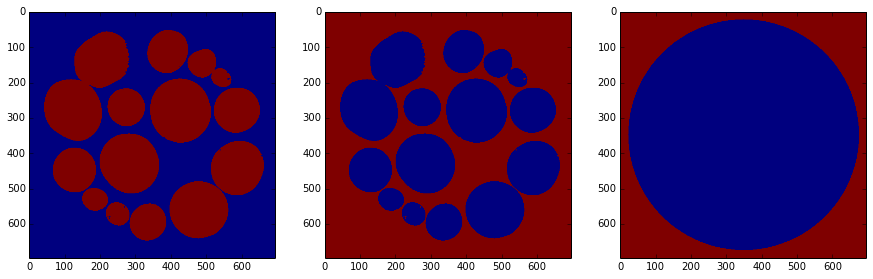

In [32]:
plt.figure(figsize = (15,4.5))
plt.subplot(131)
plt.imshow(solid_matrix[0][50,:,:])
plt.subplot(132)
plt.imshow(pore_space[0][50,:,:])
plt.subplot(133)
plt.imshow(exterior_mask[50,:,:])
plt.show()

## Step 7: Merge materials and label

In [33]:
import filterops as fltr
import morphology as morph
import scipy.ndimage.measurements as measure
import mathops

def logical_sub(src_data1, 
                src_data2):
    temp = np.logical_not(np.logical_and(src_data1, 
                                         src_data2))
    output = np.logical_and(src_data1, 
                            temp)
    return output



In [39]:
#rough quantification
labels_rough = (exterior_mask) + (pore_space[0]) + (solid_matrix[0]*3)
glass_bead_corrected = 3*(logical_sub(solid_matrix[0], exterior_mask))
pore_space_corrected = 2*(logical_sub(pore_space[0], exterior_mask))

#Merge volume:
label_field = (exterior_mask + 2*pore_space_corrected + 3*glass_bead_corrected)


TypeError: only length-1 arrays can be converted to Python scalars

In [41]:
label_field_int = label_field.astype(int)

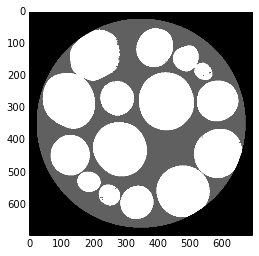

In [42]:
plt.imshow(label_field_int[50,:,:], cmap=plt.cm.gray)
plt.show()

In [44]:
import imgQuant

measures, vol_rec = imgQuant.Q_VOL(label_field_int)

Phase_0 Measured Volume
0.0 voxels
Phase_1 Measured Volume
79359800.0 voxels
Phase_2 Measured Volume
0.0 voxels
Phase_3 Measured Volume
0.0 voxels
Phase_4 Measured Volume
64278651.0 voxels
Phase_5 Measured Volume
0.0 voxels
Phase_6 Measured Volume
0.0 voxels
Phase_7 Measured Volume
0.0 voxels
Phase_8 Measured Volume
0.0 voxels
{'Material_8': {'volume': {'units': 'voxels', 'value': 0.0}, 'name': 'Phase_8'}, 'Material_0': {'volume': {'units': 'voxels', 'value': 0.0}, 'name': 'Phase_0'}, 'Material_1': {'volume': {'units': 'voxels', 'value': 79359800.0}, 'name': 'Phase_1'}, 'Material_2': {'volume': {'units': 'voxels', 'value': 0.0}, 'name': 'Phase_2'}, 'Material_3': {'volume': {'units': 'voxels', 'value': 0.0}, 'name': 'Phase_3'}, 'Material_4': {'volume': {'units': 'voxels', 'value': 64278651.0}, 'name': 'Phase_4'}, 'Material_5': {'volume': {'units': 'voxels', 'value': 0.0}, 'name': 'Phase_5'}, 'Material_6': {'volume': {'units': 'voxels', 'value': 0.0}, 'name': 'Phase_6'}, 'Material_7': {'

In [54]:

bead_vol = measures['Material_4']['volume']['value']
pore_sp_vol = measures['Material_1']['volume']['value']

bead_vol_corrected = float(bead_vol) * 9.5**3
pore_sp_vol_corrected = float(pore_sp_vol) * 9.5**3
print "Measured bead volume (um^3): " + str(bead_vol_corrected)
print "Measured pore space (um^3): " + str(pore_sp_vol_corrected)
porosity = pore_sp_vol/(bead_vol+pore_sp_vol)
print "Measured column section porosity is: " + str(porosity)

Measured bead volume (um^3): 55110908401.1
Measured pore space (um^3): 68041108525.0
Measured column section porosity is: 0.55249690767


5427


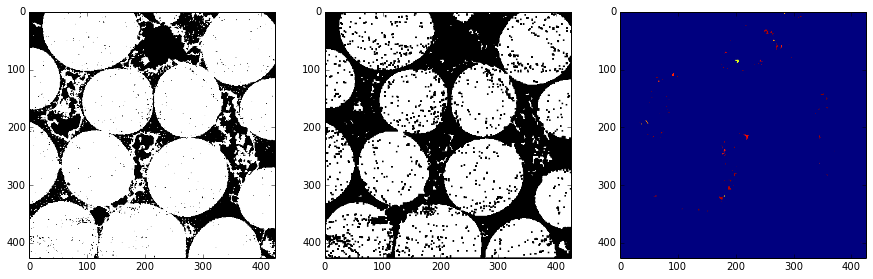

In [8]:
#Volume confirmation:
total_vol = bead_vol_corrected

In [1]:
!gist "NSLS-II Segmentation workflow design.ipynb"

https://gist.github.com/529b56087698dd0f9569
